In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('covid19_articles.csv')

In [3]:
df.shape

(5001, 3)

In [4]:
df.head()

,Unnamed: 0,title,label
0,0,"China pneumonia outbreak: It's not SARS, so wh...",FAKE
1,1,New virus identified as likely cause of myster...,REAL
2,2,China pneumonia outbreak may be caused by Sars...,FAKE
3,3,"New SARS related virus, Wuhan pneumonia, ideni...",FAKE
4,4,China's Sars-like illness worries health exper...,FAKE


In [5]:
df = df.set_index('Unnamed: 0')

In [6]:
df.head()

,title,label
Unnamed: 0,,
0,"China pneumonia outbreak: It's not SARS, so wh...",FAKE
1,New virus identified as likely cause of myster...,REAL
2,China pneumonia outbreak may be caused by Sars...,FAKE
3,"New SARS related virus, Wuhan pneumonia, ideni...",FAKE
4,China's Sars-like illness worries health exper...,FAKE


In [ ]:
#TRAINING DATA

In [7]:
y = df.label

In [8]:
df = df.drop('label', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], y, test_size=0.33)

In [ ]:
#Count Vectorizer

In [10]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [ ]:
#Tfidf Vectorizer

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
#Key words that are not required

In [12]:
tfidf_vectorizer.get_feature_names()[-10:]

['zinc',
 'ziyech',
 'zoe',
 'zombie',
 'zone',
 'zones',
 'zoom',
 'zte',
 'zumba',
 'ëmond']

In [ ]:
#Token count words that are not required

In [13]:
count_vectorizer.get_feature_names()[:10]

['000', '08', '10', '100', '1000', '106', '10bn', '10th', '11', '113']

In [ ]:
#Checking if there is anything common between obtained from Count Vectorizer and Tfidf Vectorizer
#Here we find that there is noting common

In [14]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [15]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [16]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [17]:
print(count_df.equals(tfidf_df))

False


In [18]:
count_df.head()

,000,08,10,100,1000,106,10bn,10th,11,113,...,zinc,ziyech,zoe,zombie,zone,zones,zoom,zte,zumba,ëmond
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
tfidf_df.head()

,000,08,10,100,1000,106,10bn,10th,11,113,...,zinc,ziyech,zoe,zombie,zone,zones,zoom,zte,zumba,ëmond
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Plotting Confusion Matrix using Different Classifiers

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Confusion Matrix for MultinomialNB with Tfidf vectorizer

In [21]:
clf = MultinomialNB() 

accuracy:   0.893
Confusion matrix, without normalization


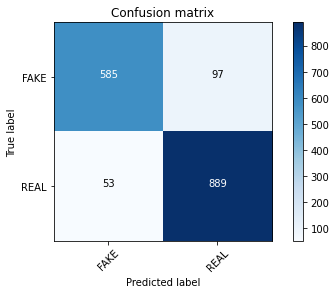

In [22]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Confusion Matrix for MultinomialNB with Count vectorizer

In [23]:
clf = MultinomialNB() 

accuracy:   0.907
Confusion matrix, without normalization


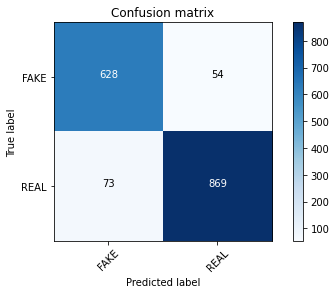

In [24]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Confusion Matrix for Passive Aggressive Classifier with Tfidf vectorizer

In [25]:
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.942
Confusion matrix, without normalization


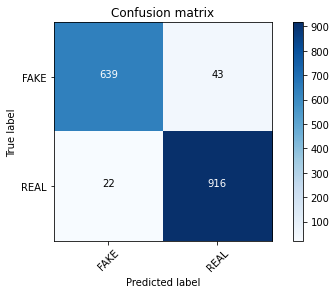

In [26]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Changing alpha value of MultinomialNB to increase performance

In [27]:
clf = MultinomialNB(alpha=0.1)

In [28]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/naive_bayes.py:506: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.00 Score: 0.81950
Alpha: 0.10 Score: 0.88734
Alpha: 0.20 Score: 0.88916
Alpha: 0.30 Score: 0.89037
Alpha: 0.40 Score: 0.89037
Alpha: 0.50 Score: 0.89340
Alpha: 0.60 Score: 0.89400
Alpha: 0.70 Score: 0.89582
Alpha: 0.80 Score: 0.89400
Alpha: 0.90 Score: 0.89461


### Introspecting models

So fake news is solved, right? We achieved 93% accuracy on my dataset so let's all close up shop and go home. 😂

Not quite, of course. I am wary at best of these results given how much noise we saw in the features. There is a great write-up [on StackOverflow](https://stackoverflow.com/a/26980472) with this incredibly useful function for finding vectors that most affect labels. It only works for binary classificaiton (classifiers with 2 classes), but that's good news for you, since you only have FAKE or REAL labels. 

Using your best performing classifier with your TF-IDF vector dataset (`tfidf_vectorizer`) and Passive Aggressive classifier (`linear_clf`), inspect the top 30 vectors for fake and real news:

In [ ]:
#Using Passive Aggressive Classifier with Tfidf Vectorizer (Best Results) on dataset

In [29]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

(Adds consumer sentiment, analyst comments, updates markets) * Retail sales increase 0.3% in January * Core retail sales unchanged; December revised lower * Industrial production falls 0.3% in January WASHINGTON, Feb 14 (Reuters) - U.S. consumer spending slowed further in January, with sales at clothing stores declining by the most since 2009, a trend that could raise concerns about the economy's ability to continue expanding at a moderate pace. The economy's outlook was also dimmed by other data on Friday showing industrial production decreased for a second straight month in January as unseasonably mild weather depressed demand for utilities, and Boeing suspended production of it troubled 737 MAX plane. The reports prompted economists to predict weaker economic growth in the first quarter. They followed on the heels of Federal Reserve Chair Jerome Powell's remarks to lawmakers this week that the "economy is in a very good place, performing well." The U.S. central bank last month left 

In [30]:
feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
#Words that are mostly present in real news

In [31]:
### Most real
sorted(zip(clf.coef_[1], feature_names), reverse=True)[:20]

[(-8.117950842253146, 'labor'),
 (-8.161634857987897, 'remains'),
 (-8.219986761135592, 'strong'),
 (-8.314076016997575, 'wrapup'),
 (-8.320011062875738, 'market'),
 (-8.617113044649392, 'ëmond'),
 (-8.617113044649392, 'zumba'),
 (-8.617113044649392, 'zte'),
 (-8.617113044649392, 'zoom'),
 (-8.617113044649392, 'zones'),
 (-8.617113044649392, 'zone'),
 (-8.617113044649392, 'zombie'),
 (-8.617113044649392, 'zoe'),
 (-8.617113044649392, 'ziyech'),
 (-8.617113044649392, 'zinc'),
 (-8.617113044649392, 'zew'),
 (-8.617113044649392, 'zero'),
 (-8.617113044649392, 'zealand'),
 (-8.617113044649392, 'zambia'),
 (-8.617113044649392, 'yum')]

In [ ]:
#Token count words that are mostly present in fake news

In [32]:
### Most fake
sorted(zip(clf.coef_[1], feature_names))[:20]

[(-8.617113044649392, '000'),
 (-8.617113044649392, '08'),
 (-8.617113044649392, '10'),
 (-8.617113044649392, '100'),
 (-8.617113044649392, '1000'),
 (-8.617113044649392, '106'),
 (-8.617113044649392, '10bn'),
 (-8.617113044649392, '10th'),
 (-8.617113044649392, '11'),
 (-8.617113044649392, '113'),
 (-8.617113044649392, '115'),
 (-8.617113044649392, '116'),
 (-8.617113044649392, '11m'),
 (-8.617113044649392, '11th'),
 (-8.617113044649392, '12'),
 (-8.617113044649392, '120m'),
 (-8.617113044649392, '13'),
 (-8.617113044649392, '130'),
 (-8.617113044649392, '132'),
 (-8.617113044649392, '139')]

In [33]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [ ]:
#Confusion Matrix for MultinomialNB with Hashing Vectorizer

In [34]:
hash_vectorizer = HashingVectorizer(stop_words='english',alternate_sign=False)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [35]:
clf = MultinomialNB(alpha=.01)

accuracy:   0.906
Confusion matrix, without normalization


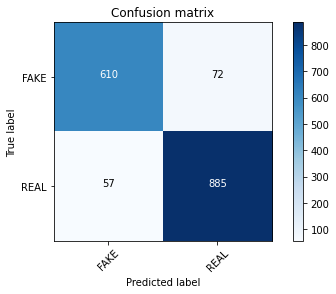

In [36]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Confusion Matrix for Passive Aggressive Classifier with Hash Vectorizer

In [37]:
clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.945
Confusion matrix, without normalization


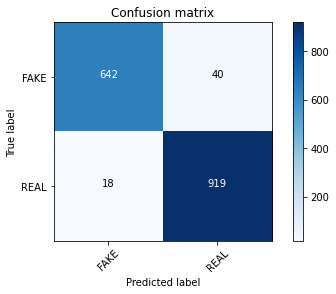

In [38]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])